In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [12]:
file_1="Dataset/B0005_dis_dataset.csv"
dataset=pd.read_csv(file_1)

In [13]:
C_max=2

#renaming columns for simplicity
dataset.columns=['cycle',"capacity",'voltage', 'current','temperature', 'current_load', 'voltage_load',"time"]

#removing ideling / starting and ending current level data  

df=dataset[dataset.current_load<-0.0006].reset_index(drop=True)

# converting time seconds->hour

df["time"]=df["time"]/3600

In [14]:
#calculate soc for each cycle
cycle_count=df["cycle"].unique()
DOD_list=[]
# Update SOC for each reading within each cycle using Coulomb counting
for cycle in cycle_count:
    cycle_data = df[df['cycle'] == cycle]
    
    cumulative_DOD = [2.0]
    
    for i in range(1, len(cycle_data)):
        
        delta_time = cycle_data['time'].iloc[i-1] - cycle_data['time'].iloc[i]
        
        delta_charge = cycle_data['current'].iloc[i] * delta_time
        
        cumulative_DOD.append(cumulative_DOD[-1] -delta_charge)
        
    DOD_list.extend(cumulative_DOD)
#DOD is the opposite if the soc 
DOD = [(q / C_max) for q in DOD_list]

df["DOD"]=DOD

<Axes: >

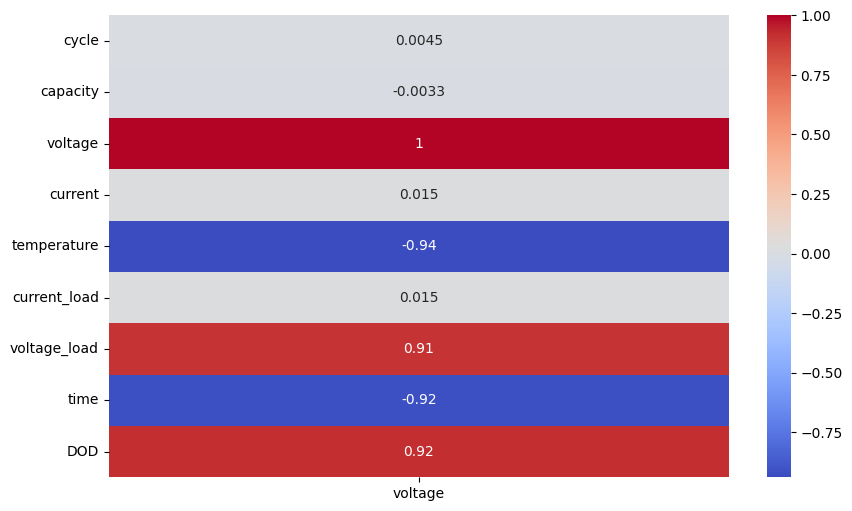

In [15]:
cor = df.corr()
plt.figure(figsize=(10,6))  #select value out of range(0.05,-0.05)
sns.heatmap(cor[["voltage"]],annot=True,cmap='coolwarm')

In [16]:
#important from this is temprature,DOD,time

In [17]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y,)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [18]:
mi_scores = make_mi_scores(df,df[["voltage"]])

mi_scores

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


voltage         7.343669
voltage_load    3.872401
time            3.661994
DOD             3.448619
temperature     2.486314
current_load    0.022632
current         0.018666
cycle           0.000000
capacity        0.000000
Name: MI Scores, dtype: float64

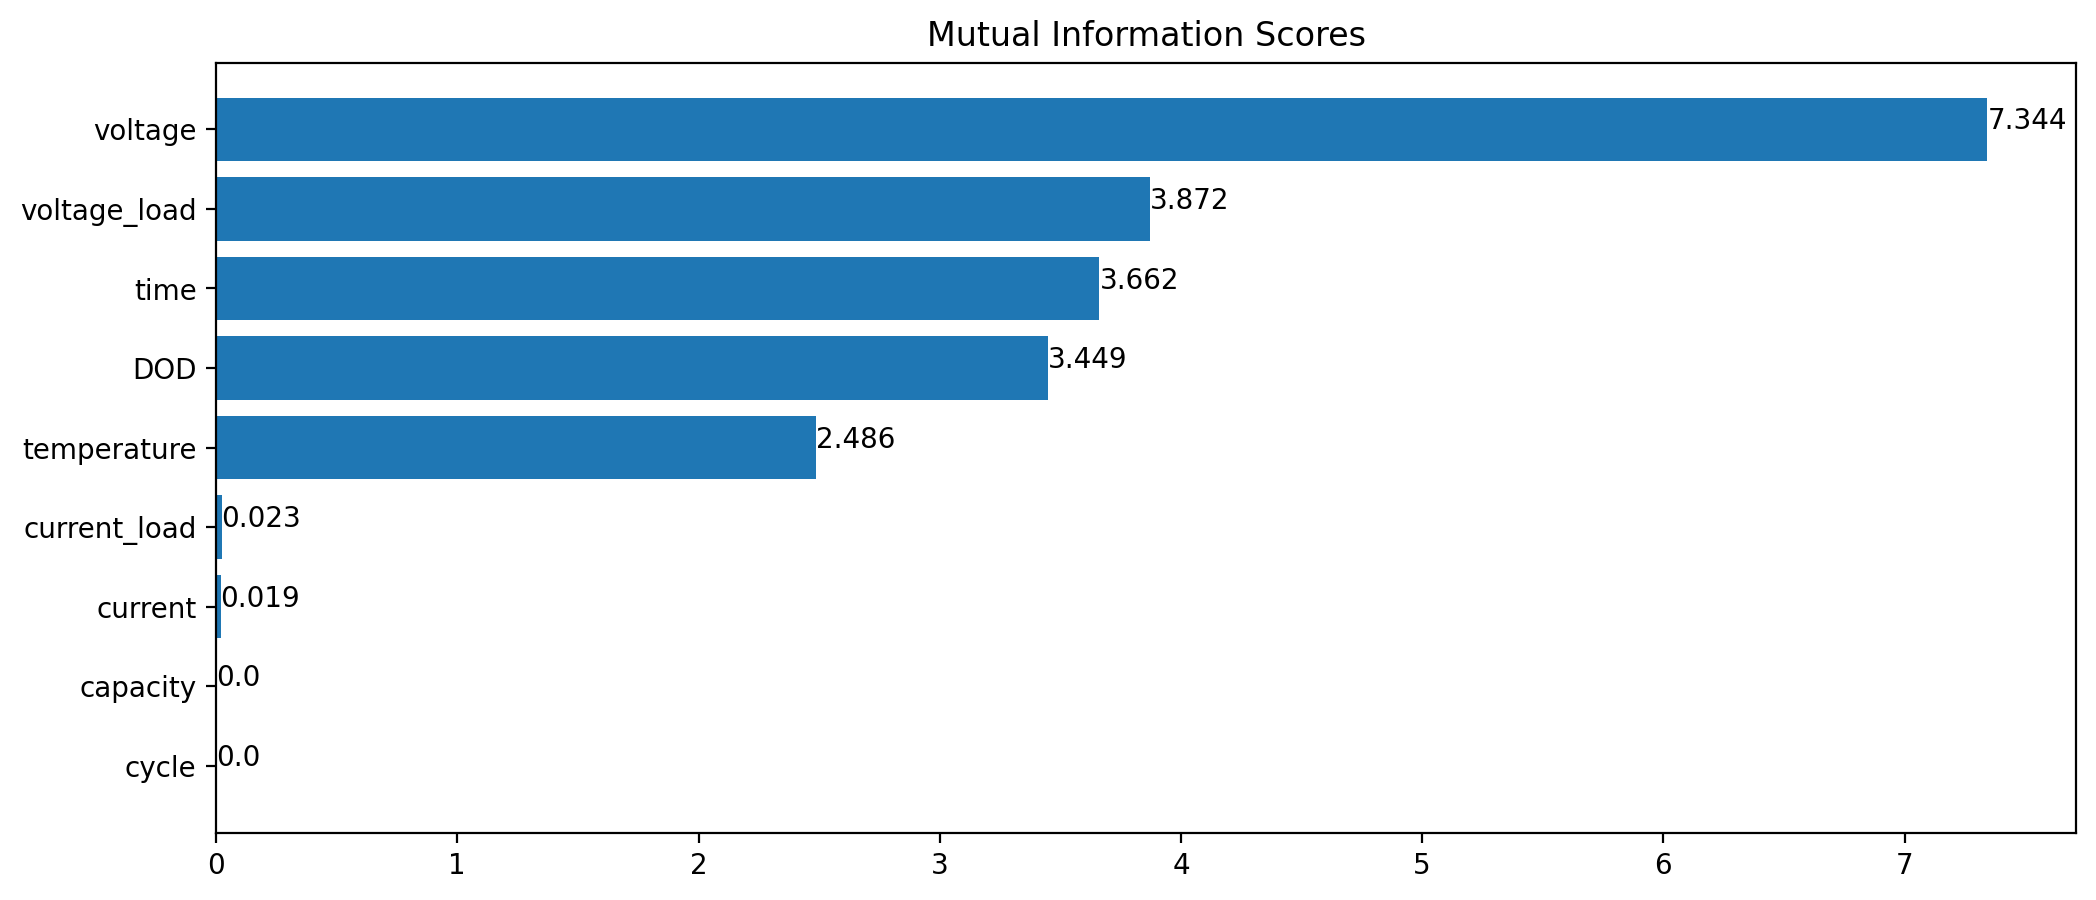

In [19]:
def plot_mi_scores(scores):
    plt.figure(dpi=200, figsize=(12, 5))
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    for index, value in enumerate(scores):
        plt.text(value, index,str(round(value,3)))
plot_mi_scores(mi_scores)

In [20]:
#temp,DOD,temprature,